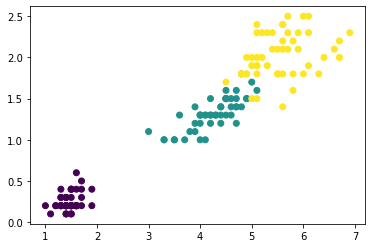

数据x的形状： (150, 2)
数据y_unique： {0, 1, 2}
针对x为[5,1.5]预测各种类的概率 [[0.         0.90740741 0.09259259]]
针对x为[5,1.5]分类的结果 [1]
分类决策树的得分 0.96


In [1]:

#决策树分类
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

iris = load_iris()
x = iris.data[:,2:]
y = iris.target


plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

#构建决策树模型
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

print('数据x的形状：',x.shape)
print('数据y_unique：',set(y))
print('针对x为[5,1.5]预测各种类的概率',tree_clf.predict_proba([[5,1.5]]))
print('针对x为[5,1.5]分类的结果',tree_clf.predict([[5,1.5]]))
print('分类决策树的得分',tree_clf.score(x,y))

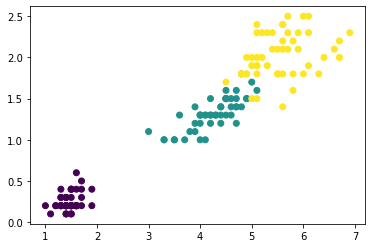

数据y的种类： {0, 1, 2}
回归的结果 [1.09259259]
回归决策树的得分 0.96


'Source.gv.pdf'

In [2]:
#决策树回归
# 上面案例导入的方法是：DecisionTreeClassifier
# 可以看到虽然是分类数据{0，1，2},但是用DecisionTreeRegressor得到的结果是回归结果
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

print('数据y的种类：',set(y))
print('回归的结果',tree_reg.predict([[5,1.5]]))
print('回归决策树的得分',tree_clf.score(x,y))

from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(tree_reg)
graph = graphviz.Source(dot_data)
graph.view()

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

data = pd.read_excel(r'C:\Users\24132\Desktop\data.xlsx')
data_y = np.array(data.iloc[:,2:4])
data_x = np.array(data.iloc[:,4:])

# pca = PCA(n_components=5)
# data_x = pca.fit_transform(data_x)
# print(pca.explained_variance_ratio_)



x_train,x_val,y_train,y_val = train_test_split(data_x,data_y,test_size=0.1)

y1_train = np.array([i[0] for i in y_train])
y2_train = np.array([i[1] for i in y_train])
y1_val = np.array([i[0] for i in y_val])
y2_val = np.array([i[1] for i in y_val])


def pre(x_train,y_train,x_val,y_val,model):
    model.fit(x_train,y_train)
    print('训练集得分：',model.score(x_train,y_train))
    print('验证集得分：',model.score(x_val,y_val))
#     print('验证集均方误差',mean_squared_error(model.predict(x_val),y_val))
    print('r2得分：',r2_score(model.predict(x_val),y_val))
    

model = Pipeline([
    ('scaler',StandardScaler()),
    ('decision_tree',DecisionTreeRegressor(max_depth=15))
])

model = DecisionTreeRegressor(max_depth=15)
# max_ = 0
# q = 0
# for i in range(50,200):
#     model = RandomForestRegressor(n_estimators=i, random_state=0)
#     model.fit(x_train,y2_train)
#     if r2_score(model.predict(x_val),y2_val)>max_:
#         q = i
#         max_ = r2_score(model.predict(x_val),y2_val)
# print(q,max_)
    

# model= Pipeline([
#     ('scaler',StandardScaler()),
#     ('svr',SVR(kernel='poly',degree=1))
# ])

model1 = Pipeline([
    ('scaler',StandardScaler()),
    ('random_forest',RandomForestRegressor(n_estimators=134, random_state=0))
])

model2 = Pipeline([
    ('scaler',StandardScaler()),
    ('random_forest',RandomForestRegressor(n_estimators=159, random_state=0))
])

# model = RandomForestRegressor(n_estimators=134, random_state=0)
# model = DecisionTreeRegressor(max_depth=5)


print('temp评价指标:')
pre(x_train,y1_train,x_val,y1_val,model)
# pre(x_train,y1_train,x_val,y1_val,model1)
print('\nrainfall评价指标')
pre(x_train,y2_train,x_val,y2_val,model)
pre(x_train,y2_train,x_val,y2_val,model2)


from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(model)
graph = graphviz.Source(dot_data)
graph.view()

temp评价指标:
训练集得分： 0.9576465272679322
验证集得分： 0.04516075093661498
r2得分： 0.07049735315804517

rainfall评价指标
训练集得分： 0.982395138062668
验证集得分： 0.4880247607466347
r2得分： 0.5093552109587072
训练集得分： 0.9700310983972514
验证集得分： 0.7412235727590555
r2得分： 0.6627123262174222


'Source.gv.pdf'

In [3]:
#Temp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

print(type(x_train),type(y1_train))
print(x_train.shape,y1_train.shape)
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='adam')#回归不用metrics=['accuracy']
history = model.fit(x_train,y1_train,epochs=150,validation_split=0.1)
mse_test = model.evaluate(x_val,y1_val)
x_new = x_val[:3]
y_pred = model.predict(x_new)

print('r2得分：',r2_score(model.predict(x_val),y1_val))

print(mse_test,y_pred,y1_val[:3])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(3038, 8) (3038,)
Epoch 1/150
86/86 [==============================] - 0s 4ms/step - loss: 124.6028 - val_loss: 124.3847
Epoch 2/150
86/86 [==============================] - 0s 2ms/step - loss: 110.0367 - val_loss: 110.1849
Epoch 3/150
86/86 [==============================] - 0s 2ms/step - loss: 97.6904 - val_loss: 102.2106
Epoch 4/150
86/86 [==============================] - 0s 2ms/step - loss: 86.1616 - val_loss: 88.2726
Epoch 5/150
86/86 [==============================] - 0s 2ms/step - loss: 74.5254 - val_loss: 76.0266
Epoch 6/150
86/86 [==============================] - 0s 2ms/step - loss: 64.0511 - val_loss: 60.6020
Epoch 7/150
86/86 [==============================] - 0s 2ms/step - loss: 54.7795 - val_loss: 50.4301
Epoch 8/150
27/86 [========>.....................] - ETA: 0s - loss: 48.5409

KeyboardInterrupt: 

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Epoch 1/150
86/86 [==============================] - 0s 4ms/step - loss: 639095.5000 - val_loss: 596129.3750
Epoch 2/150
86/86 [==============================] - 0s 2ms/step - loss: 637493.9375 - val_loss: 595193.8125
Epoch 3/150
86/86 [==============================] - 0s 2ms/step - loss: 635762.6250 - val_loss: 592984.1875
Epoch 4/150
86/86 [==============================] - 0s 2ms/step - loss: 633617.6250 - val_loss: 590373.7500
Epoch 5/150
86/86 [==============================] - 0s 2ms/step - loss: 631180.6875 - val_loss: 588080.5000
Epoch 6/150
86/86 [==============================] - 0s 2ms/step - loss: 628521.6875 - val_loss: 585569.5000
Epoch 7/150
86/86 [==============================] - 0s 2ms/step - loss: 625564.1875 - val_loss: 582106.7500
Epoch 8/150
86/86 [==============================] - 0s 2ms/step - loss: 622194.1250 - val_loss: 579569.3750
Epoch 9/150
86/86 [==============================] - 0s 2ms/step - loss: 618733.

11/11 [==============================] - 0s 792us/step - loss: 73709.9453
r2得分： 0.5321789649308348
73709.9453125 [[ 961.362  ]
 [ 212.19244]
 [1463.0521 ]] [1870.3  200.3 1797.6]


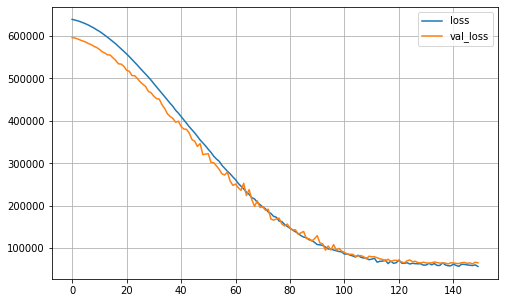

In [142]:
#rainfall
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

print(type(x_train),type(y1_train))

model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])
model.compile(loss='mse',optimizer='adam')#回归不用metrics=['accuracy']
history = model.fit(x_train,y2_train,epochs=150,validation_split=0.1)
mse_test = model.evaluate(x_val,y2_val)
x_new = x_val[:3]
y_pred = model.predict(x_new)

print('r2得分：',r2_score(model.predict(x_val),y2_val))

print(mse_test,y_pred,y2_val[:3])
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()